In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
h= pd.read_csv("Housing.csv")

In [3]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
h.shape

(545, 13)

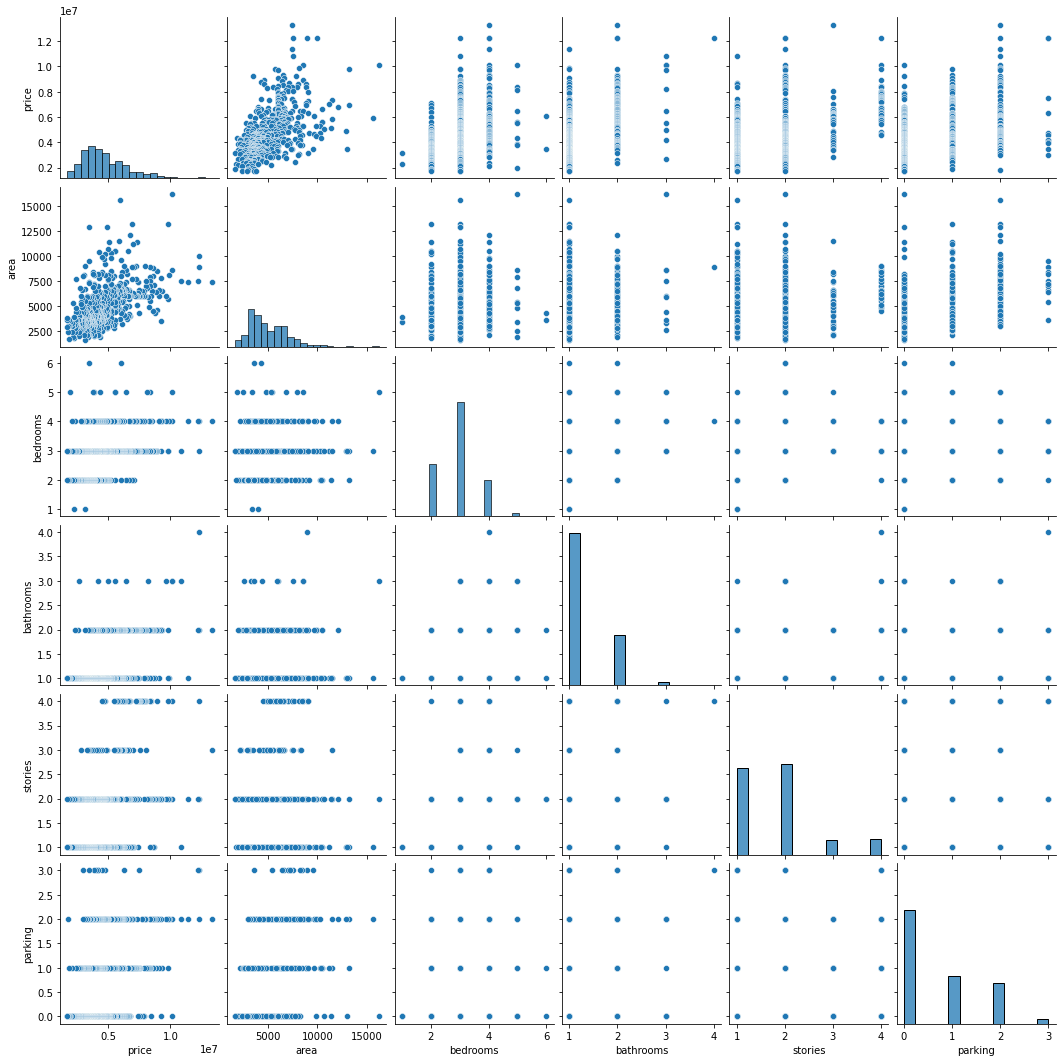

In [5]:
#visualising the numeric variables
sns.pairplot(h)

In [6]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
h.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:xlabel='mainroad', ylabel='price'>

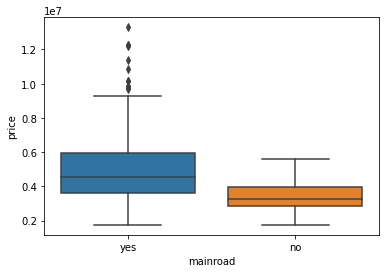

In [8]:
#visualising the relation between main road and price
sns.boxplot(x= "mainroad", y="price", data= h)

#### Preparing the data 

In [9]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Converting binary variables

In [10]:
varlist= ["mainroad" , "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

h[varlist]


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [11]:
h[varlist]= h[varlist].apply(lambda x: x.map({"yes": 1 , "no" : 0}))

In [12]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


###  Dummy Variables

In [14]:
status= pd.get_dummies(h["furnishingstatus"])
status    

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [15]:
status= pd.get_dummies(h["furnishingstatus"], drop_first= True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [16]:
h= pd.concat([h, status], axis= 1)

In [17]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [18]:
h= h.drop("furnishingstatus", axis=1)

In [19]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Splitting into test and train datasets


In [20]:
df_train, df_test= train_test_split(h, train_size= 0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling the features
- MinMaxScalar: between 0-1(Normalisation)
- Standardisation: between mean and sigma

In [21]:
#fit(): learns xmin, xmax
#transform(): does both wwhat fits learnt x- xmin/ xmax-xmin
#fit_transform(): does both in one go

In [22]:
#using MinMaxScaler
#instantiate an object
scaler= MinMaxScaler()


#create a list of numeric variables
num= ["area", "parking", "bedrooms", "stories", "bathrooms", "price"]


#fit on the data
df_train[num]=scaler.fit_transform(df_train[num])


In [23]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Training the model

<AxesSubplot:>

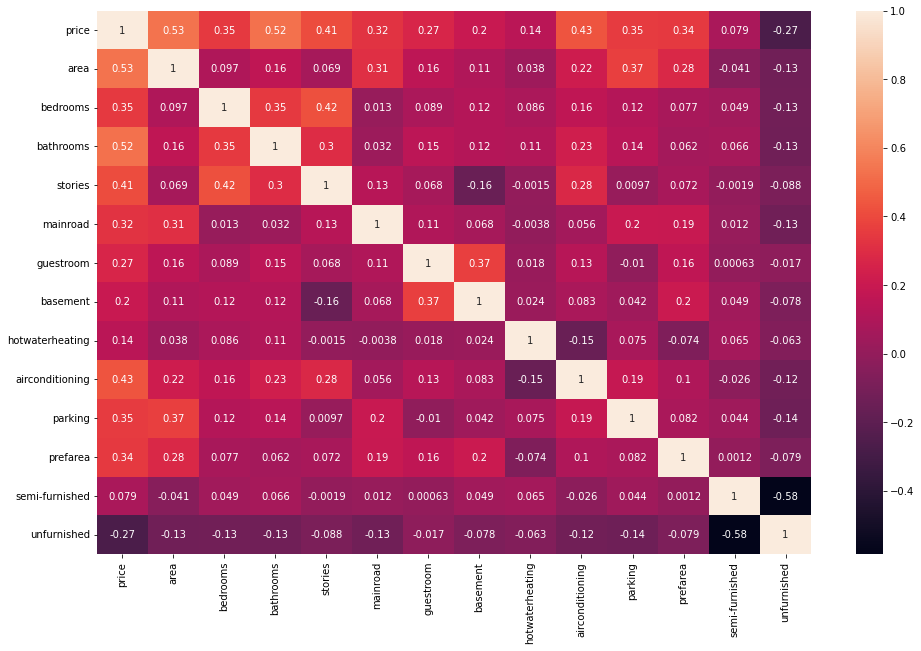

In [25]:
plt.rcParams["figure.figsize"]=(16,10)
sns.heatmap(df_train.corr(), annot= True)

In [26]:
#create training model
y_train=df_train.pop("price")
X_train=df_train

In [27]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [28]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

### Using statsmodels


### Forward Selection

In [29]:
#add a constant
X_train_sm= sm.add_constant(X_train["area"])

#create first model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model= lr.fit()

In [30]:
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [31]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.15e-29
Time:                        14:12:28   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#add another variable bathrooms


X_train_sm= sm.add_constant(X_train[["area", "bathrooms"]])


lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [33]:
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.51e-54
Time:                        14:12:28   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#add another variable bedrooms

X_train_sm= sm.add_constant(X_train[["area", "bathrooms", "bedrooms"]])

lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [36]:
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.12e-57
Time:                        14:12:28   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Backward selection

In [38]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [39]:
#adding all the variables to the model at once

X_train_sm= sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_sm)

lr_model= lr.fit()

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           8.83e-83
Time:                        14:12:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

###### first we look at the signifivance of the variables depending on p-value and VIF

### Check VIF
Variance inflation factor or VIF,  gives the basic quantitative idea about how much the feature variables are corelated with each otherit is an extremely important parameter to test our linear model


###### VIF cases
- high p-value, high VIF
- low p_value, high VIF
- HIGH-LOW cases:
        -high p-value, low VIF- more important to take these out first
        -low p-value, high VIF - take them out later 

In [42]:
vif= pd.DataFrame()
vif["features"]= X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"], 2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [43]:
#remove the variales with pvalue first and build the model again
X_train= X_train.drop("semi-furnished", axis=1)

In [44]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [45]:
#training the model again
X_train_sm= sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train)

lr_model= lr.fit()

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              328.7
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                   1.21e-188
Time:                        14:12:29   Log-Likelihood:                          381.16
No. Observations:                 381   AIC:                                     -738.3
Df Residuals:                     369   BIC:                                     -691.0
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.2405      0.029      8.188      0.000       0.183       0.298
bedrooms            0.0720      0.029      2.504      0.013       0.015       0.129
bathrooms           0.1887      0.022      8.631      0.000       0.146       0.232
stories             0.1065      0.019      5.588      0.000       0.069       0.144
mainroad            0.0591      0.012      4.951      0.000       0.036       0.083
guestroom           0.0298      0.014      2.189      0.029       0.003       0.056
basement            0.0224      0.011      2.023      0.044       0.001       0.044
hotwaterheating     0.0856      0.022      3.974      0.000       0.043       0.128
airconditioning     0.0677      0.011      6.012      0.000       0.046       0.090
parking             0.0602      0.018      3.342      0.001       0.025       0.096
prefarea            0.0587      0.012      4.988      0.000       0.036       0.082
unfurnished        -0.0278      0.010     -2.895      0.004      -0.047      -0.009
==============================================================================
Omnibus:                       85.567   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.685
Skew:                           1.011   Prob(JB):                     3.35e-58
Kurtosis:                       6.548   Cond. No.                         9.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#computing the vifs again after removing semi-furninshed
vif=pd.DataFrame()
vif["features"]= X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"]= round(vif["VIF"], 2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [48]:
#training the model again after removing bedrooms
X_train= X_train.drop("bedrooms", axis=1)

X_train_sm= sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train)

lr_model= lr.fit()

In [49]:
#checking vif of the variables again
vif=pd.DataFrame()
vif["features"]= X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]= round(vif["VIF"], 2)
vif=vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              353.0
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                   1.40e-188
Time:                        14:12:30   Log-Likelihood:                          377.95
No. Observations:                 381   AIC:                                     -733.9
Df Residuals:                     370   BIC:                                     -690.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.2525      0.029      8.652      0.000       0.195       0.310
bathrooms           0.1989      0.022      9.193      0.000       0.156       0.241
stories             0.1263      0.017      7.233      0.000       0.092       0.161
mainroad            0.0708      0.011      6.418      0.000       0.049       0.093
guestroom           0.0276      0.014      2.020      0.044       0.001       0.054
basement            0.0297      0.011      2.764      0.006       0.009       0.051
hotwaterheating     0.0907      0.022      4.202      0.000       0.048       0.133
airconditioning     0.0686      0.011      6.052      0.000       0.046       0.091
parking             0.0645      0.018      3.574      0.000       0.029       0.100
prefarea            0.0578      0.012      4.885      0.000       0.035       0.081
unfurnished        -0.0226      0.009     -2.396      0.017      -0.041      -0.004
==============================================================================
Omnibus:                       82.139   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.377
Skew:                           0.979   Prob(JB):                     1.92e-54
Kurtosis:                       6.428   Cond. No.                         8.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can now hereby see that the VIF of all the variables is now less than 5

### Residual analysis and Predictions

In [51]:
y_train_pred= lr_model.predict(X_train)

<AxesSubplot:ylabel='Density'>

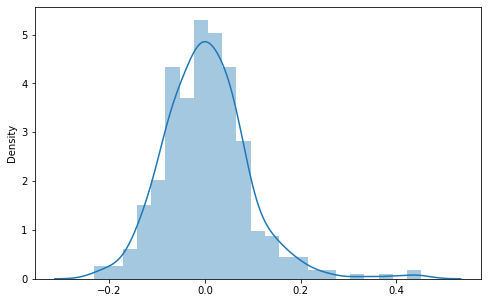

In [52]:
res= y_train-y_train_pred
plt.rcParams["figure.figsize"]=(8,5)
sns.distplot(res)

In [53]:
num= ["area", "parking", "bedrooms", "stories", "bathrooms", "price"]


#fit on the data
df_test[num]=scaler.transform(df_test[num])
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test= df_test.pop("price")
X_test= df_test

In [55]:
#add a constant
X_test_sm= sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [56]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              353.0
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                   1.40e-188
Time:                        14:12:31   Log-Likelihood:                          377.95
No. Observations:                 381   AIC:                                     -733.9
Df Residuals:                     370   BIC:                                     -690.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.2525      0.029      8.652      0.000       0.195       0.310
bathrooms           0.1989      0.022      9.193      0.000       0.156       0.241
stories             0.1263      0.017      7.233      0.000       0.092       0.161
mainroad            0.0708      0.011      6.418      0.000       0.049       0.093
guestroom           0.0276      0.014      2.020      0.044       0.001       0.054
basement            0.0297      0.011      2.764      0.006       0.009       0.051
hotwaterheating     0.0907      0.022      4.202      0.000       0.048       0.133
airconditioning     0.0686      0.011      6.052      0.000       0.046       0.091
parking             0.0645      0.018      3.574      0.000       0.029       0.100
prefarea            0.0578      0.012      4.885      0.000       0.035       0.081
unfurnished        -0.0226      0.009     -2.396      0.017      -0.041      -0.004
==============================================================================
Omnibus:                       82.139   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.377
Skew:                           0.979   Prob(JB):                     1.92e-54
Kurtosis:                       6.428   Cond. No.                         8.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_test_sm.columns

Index(['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [58]:
X_test_sm= X_test_sm.drop(["bedrooms", "semi-furnished","const"],axis=1)
X_test_sm.shape

(164, 11)

In [59]:
#predictions
y_test_pred= lr_model.predict(X_test_sm)

In [60]:
X_test_sm.shape

(164, 11)

In [61]:
r2_score(y_test, y_test_pred)

0.6651239479999451

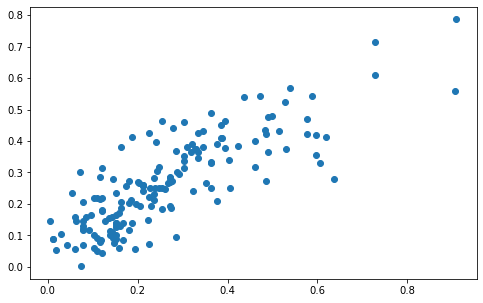

In [62]:
plt.scatter(y_test, y_test_pred)